In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 96
IMG_SHAPE = IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
# help(tf.keras.applications.mobilenet_v3())
mobile.summary()

2022-11-15 09:11:54.230065: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

In [3]:
train_path = 'transferdata/Train/'
valid_path = 'transferdata/Val/'
test_path = 'transferdata/Test/'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(96,96), batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(96,96), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(96,96), batch_size=32, shuffle=False)

Found 306 images belonging to 4 classes.
Found 76 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [17]:
def prepare_image(file):
    img_path = './transferdata/Train/Normal_Apple/'
    img = image.load_img(img_path + file, target_size=(96, 96))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

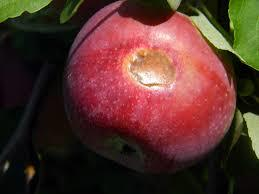

In [19]:
from IPython.display import Image
Image(filename='./transferdata/Train/Normal_Apple/Normal_Apple1.jpg', width=96,height=96) 

In [20]:
preprocessed_image = prepare_image('Normal_Apple1.jpg')
predictions = mobile.predict(preprocessed_image)

In [16]:
!ls transferdata/Train/Normal_Apple/Normal_Apple1.jpg

transferdata/Train/Normal_Apple/Normal_Apple1.jpg
